## Data

The file movies_merged contains a dataframe with the same name that has 40K rows and 39 columns. Each row represents a movie title and each column represents a descriptor such as Title, Actors, and Budget. I collected the data by querying IMDb’s API (see www.omdbapi.com) and joining it with a separate dataset of movie budgets and gross earnings (unknown to you). The join key was the movie title. This data is available for personal use, but IMDb’s terms of service do not allow it to be used for commercial purposes or for creating a competing repository.

## Objective

Your goal is to investigate the relationship between the movie descriptors and the box office success of movies, as represented by the variable Gross. This task is extremely important as it can help a studio decide which titles to fund for production, how much to bid on produced movies, when to release a title, how much to invest in marketing and PR, etc. This information is most useful before a title is released, but it is still very valuable after the movie is already released to the public (for example it can affect additional marketing spend or how much a studio should negotiate with on-demand streaming companies for “second window” streaming rights).

## Tasks

Each task below is worth 10 points, and is meant to be performed sequentially, i.e. do step 2 after you have processed the data as described in step 1. Total points: 100
Complete each task by implementing code chunks as described by TODO comments, and by responding to questions (“Q:”) with written answers (“A:”). If you are unable to find a meaningful or strong relationship in any of the cases when requested, explain why not by referring to appropriate plots/statistics.

### Task 1: Remove non-movie rows

The variable Type captures whether the row is a movie, a TV series, or a game. Remove all rows from df that do not correspond to movies.

### Task 2: Process Runtime column
The variable Runtime represents the length of the title as a string. Write Python code to convert it to a numeric
value (in minutes) and replace df.Runtime with the new numeric column RuntimeMins.


Now investigate the distribution of Runtime values and how it changes over years (variable Year, which you can bucket into decades) and in relation to the budget (variable Budget). Include any plots that illustrate.

Question: Comment on the distribution as well as relationships. Are there any patterns or trends that you can observe? Enter answer in the below cell.

What are the 10 most common genres? Plot the relative proportions of movies having the top 10 most common genres.

Examine how the distribution of Runtime changes across genres for the top 10 most common genres.

### Task 4: Eliminate mismatched rows

The dataframe was put together by merging two different sources of data and it is possible that the merging process was inaccurate in some cases (the merge was done based on movie title, but there are cases of different movies with the same title). The first source’s release time was represented by the column Year (numeric representation of the year) and the second by the column Released (string representation of release date).

Find and remove all rows where you suspect a merge error occurred based on a mismatch between these two variables. To make sure subsequent analysis and modeling work well, avoid removing more than 10% of the rows that have a Gross value present.

### Task 5: Explore Gross revenue

For the commercial success of a movie, production houses want to maximize Gross revenue. Investigate if
Gross revenue is related to Budget, Runtime or Genre in any way.
Note: To get a meaningful relationship, you may have to partition the movies into subsets such as short vs. long duration, or by genre, etc.

Question: Did you find any observable relationships or combinations of Budget/Runtime/Genre that result in high Gross revenue? If you divided the movies into different subsets, you may get different answers for them - point out interesting ones.

### Task 6: Process Awards Column

The variable Awards describes nominations and awards in text format. Convert it to 2 numeric columns, the first capturing the number of wins, and the second capturing nominations. Replace the Awards column with these new columns, and then study the relationship of Gross revenue with respect to them.
Note that the format of the Awards column is not standard; you may have to use regular expressions to find the relevant values. Try your best to process them, and you may leave the ones that don’t have enough information as NAs or set them to 0s.

Question: How did you construct your conversion mechanism? How many rows had valid/non-zero wins or nominations?

### Task 7: Movie ratings from IMDb and Rotten Tomatoes

There are several variables that describe ratings, including IMDb ratings (imdbRating represents average user ratings and imdbVotes represents the number of user ratings), and multiple Rotten Tomatoes ratings (represented by several variables pre-fixed by tomato). Read up on such ratings on the web (for example
rottentomatoes.com/about and www.imdb.com/help/show_leaf?votestopfaq). Investigate the pairwise relationships between these different descriptors using graphs.

Question: Comment on the similarities and differences between the user ratings of IMDb and the critics ratings of Rotten Tomatoes.

### Task 8: Ratings and awards

These ratings typically reflect the general appeal of the movie to the public or gather opinions from a larger body of critics. Whereas awards are given by professional societies that may evaluate a movie on specific attributes, such as artistic performance, screenplay, sound design, etc.
Study the relationship between ratings and awards using graphs (awards here refers to wins and/or nomina- tions).

Q: How good are these ratings in terms of predicting the success of a movie in winning awards or nominations? Is there a high correlation between two variables?

### Task 9. Expected insights
Come up with two new insights (backed up by data and graphs) that is expected. Here “new” means insights that are not an immediate consequence of one of the above tasks. You may use any of the columns already explored above or a different one in the dataset, such as Title, Actors, etc.

### Task 10. Unexpected insight
Come up with one new insight (backed up by data and graphs) that is unexpected at first glance and do your best to motivate it. Same instructions apply as the previous task.

In [1]:
#Importing csv file 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import re

url = r"C:\Users\param\Downloads\movies (1).csv"
df = pd.read_csv(url)
print(df['Runtime'].head(10))

0    1 h 30 min
1        21 min
2       106 min
3        75 min
4        14 min
5        82 min
6        65 min
7           NaN
8        95 min
9        85 min
Name: Runtime, dtype: object


In [25]:
#Identifying number of rows and columns 
print(df.shape)

(40789, 40)


In [26]:
#identifyinf count and datatypes of columns
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40789 entries, 0 to 40788
Data columns (total 40 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         40789 non-null  int64  
 1   Title              40789 non-null  object 
 2   Year               40789 non-null  int64  
 3   Rated              20003 non-null  object 
 4   Released           35719 non-null  object 
 5   Runtime            39805 non-null  object 
 6   Genre              39755 non-null  object 
 7   Director           39470 non-null  object 
 8   Writer             36394 non-null  object 
 9   Actors             39161 non-null  object 
 10  Plot               33621 non-null  object 
 11  Language           39069 non-null  object 
 12  Country            40217 non-null  object 
 13  Awards             15070 non-null  object 
 14  Poster             27488 non-null  object 
 15  Metascore          5210 non-null   float64
 16  imdbRating         395

In [40]:
#identifying missing values for all the columns
df.isna().sum()

Unnamed: 0               0
Title                    0
Year                     0
Rated                19831
Released              4731
Runtime                  0
Genre                  876
Director              1001
Writer                3906
Actors                1421
Plot                  6491
Language              1600
Country                532
Awards               24828
Poster               12513
Metascore            34595
imdbRating             740
imdbVotes              778
imdbID                   0
Type                     0
tomatoMeter          30351
tomatoImage          30360
tomatoRating         30361
tomatoReviews        30307
tomatoFresh          30307
tomatoRotten         30307
tomatoConsensus      35607
tomatoUserMeter      21747
tomatoUserRating     21665
tomatoUserReviews    15823
tomatoURL            16014
DVD                  22994
BoxOffice            39780
Production           22116
Website              34939
Response                 0
Budget               35276
D

In [ ]:
#Analyzing statistical summary for all the columns
print(df.describe())

          Unnamed: 0          Year  Runtime    Metascore    imdbRating  \
count   40789.000000  40789.000000  40789.0  5210.000000  39535.000000   
mean    25116.814877   1980.954963      0.0    54.784261      6.252146   
std     24214.945395     25.020166      0.0    18.049470      1.207422   
min         1.000000   1888.000000      0.0     1.000000      1.000000   
25%     10414.000000   1962.000000      0.0    42.000000      5.600000   
50%     20691.000000   1989.000000      0.0    55.000000      6.400000   
75%     31696.000000   2001.000000      0.0    68.000000      7.100000   
max    112382.000000   2018.000000      0.0   100.000000      9.800000   

          imdbVotes  tomatoMeter  tomatoRating  tomatoReviews  tomatoFresh  \
count  3.949700e+04  9458.000000   9448.000000    9502.000000  9502.000000   
mean   1.205867e+04    58.579192      5.874968      57.375289    34.281309   
std    5.702163e+04    28.856973      1.527928      63.167701    46.668462   
min    5.000000e+00  

In [ ]:
#Task 1 - Removing all non movie rows 
for i in df.index:
    if df.loc[i,"Type"] != "movie":
        df.drop(i , inplace = True)
print(df.shape)
#There are 40k rows that are left after removal

(40000, 40)


In [ ]:
#Processing runtime column
empty_cells = df["Runtime"].isnull().sum()
print(empty_cells)

751


In [ ]:
directors_count = df["Director"].nunique()
writers_count = df["Writer"].nunique()
actors_count = df["Actors"].nunique()

print("Number of distinct directors:", directors_count)
print("Number of distinct writers:", writers_count)
print("Number of distinct actors:", actors_count)


Number of distinct directors: 18629
Number of distinct writers: 31808
Number of distinct actors: 37520


In [ ]:
#Converting runtime column values in same format (Approach 2)
import pandas as pd

df = pd.read_csv(r"C:\Users\param\Downloads\movies (1).csv")

# Drop rows with null values in the 'Runtime' column
df.dropna(subset=['Runtime'], inplace=True)

pattern = r"(\d+)\s[h]\s(\d+)\s[min]\w"
mask = df['Runtime'].str.contains(pattern, regex=True)
df = df[~mask]

df['Runtime'] = df['Runtime'].str.replace(' min', '')
df['Runtime'] = df['Runtime'].str.replace(' min', '')
df['Runtime'] = pd.to_numeric(df['Runtime'], errors='coerce')

print(df['Runtime'].head(5))

# Save the filtered DataFrame to a new CSV file
df.to_csv(r"C:\Users\param\Downloads\movies_filtered.csv", index=False)


C:\Users\param\AppData\Local\Temp\ipykernel_2912\1478367943.py:9: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  mask = df['Runtime'].str.contains(pattern, regex=True)


1     21.0
2    106.0
3     75.0
4     14.0
5     82.0
Name: Runtime, dtype: float64


In [30]:
#Converting runtime column values in same format (Approach 2)
import re
import pandas as pd

RuntimeMins = []
url = r"C:\Users\param\Downloads\movies (1).csv"
df = pd.read_csv(url)
df.dropna(subset=['Runtime'], inplace=True)

for i, entry in enumerate(df['Runtime']):
    total_min = 0
    pattern1 = r"(\d+)\s[h]\s(\d+)\s[min]\w"
    pattern2 = r"(\d+)\s[min]\w"
    match1 = re.match(pattern1, entry)
    match2 = re.match(pattern2, entry)
    if match1:
        total_min = int(match1.group(1)) * 60 + int(match1.group(2))
    elif match2:
        total_min = int(match2.group(1))
    RuntimeMins.append(total_min)

df['RuntimeMins'] = RuntimeMins

print(df['RuntimeMins'].head(5))


0     90
1     21
2    106
3     75
4     14
Name: RuntimeMins, dtype: int64


In [3]:
#Converting years into decades
df['decades'] = (df['Year'] // 10) * 10
df = df.sort_values('decades')
decades = np.unique(df['decades']) 

print(decades)


[1880 1890 1900 1910 1920 1930 1940 1950 1960 1970 1980 1990 2000 2010]


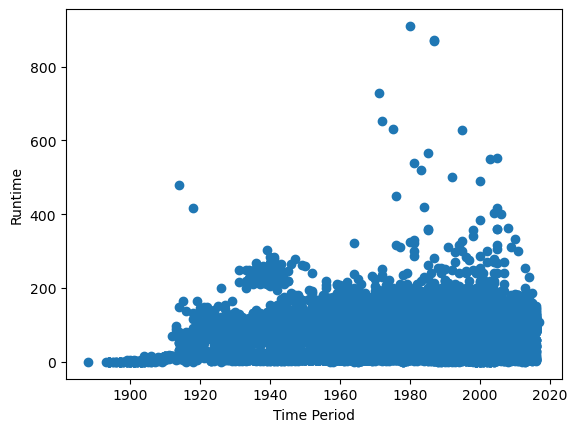

In [ ]:
#Creating visualization for examination of Runtime over the years 
plt.scatter(df['Year'],df['RuntimeMins'])
plt.xlabel("Time Period")
plt.ylabel("Runtime")
plt.show()

In [ ]:
#Cleaning and storing items from Genre column in a list

df['Genre'] = df['Genre'].astype(str)
my_list = []
for i in df['Genre']:
    my_list.extend(i.split(','))

cleaned_list = []

for item in my_list:
    clean_item = item.strip()
    cleaned_list.append(clean_item)

print("UNCLEANED LIST :",my_list)
print("CLEANED LIST : " ,cleaned_list)


UNCLEANED LIST : ['Documentary', ' Biography', ' Romance', 'Short', ' Thriller', 'Documentary', 'Drama', ' Romance', 'War', ' Short', 'Documentary', ' Biography', 'Comedy', ' Horror', ' Sci-Fi', 'Documentary', 'Comedy', ' Adventure', ' Romance', 'Horror', ' Sci-Fi', ' Thriller', 'Documentary', ' Family', 'Comedy', ' Documentary', ' Drama', 'Horror', ' Sci-Fi', 'Documentary', ' Comedy', ' History', 'Comedy', ' Romance', 'Comedy', 'Comedy', ' Romance', 'Drama', 'Drama', 'Crime', ' Drama', ' Romance', 'Adventure', ' Comedy', ' Family', 'Crime', ' Drama', 'Action', ' Crime', ' Drama', 'Comedy', 'Comedy', 'Documentary', 'Comedy', ' Crime', ' Music', 'Comedy', 'Comedy', ' Drama', ' Family', 'Drama', ' Mystery', ' Sci-Fi', 'Documentary', 'Comedy', ' Drama', ' Romance', 'Drama', 'Short', 'Horror', ' Thriller', 'Short', 'Drama', 'Drama', ' Horror', ' Mystery', 'Comedy', 'Action', ' Drama', 'Comedy', 'Comedy', ' Short', ' Action', ' Horror', 'Comedy', ' Short', 'Thriller', 'Comedy', ' Fantasy', 

In [ ]:
#extracting individual Genre 
list2 = []
for item in my_list:
    clean_item = item.strip()
    if clean_item not in list2:
        list2.append(clean_item)

print(list2)


['Documentary', 'Biography', 'Romance', 'Short', 'Thriller', 'Drama', 'War', 'Comedy', 'Horror', 'Sci-Fi', 'Adventure', 'Family', 'History', 'Crime', 'Action', 'Music', 'Mystery', 'Fantasy', 'Sport', 'Animation', 'Musical', 'nan', 'Talk-Show', 'Adult', 'Western', 'Game-Show', 'Film-Noir', 'Reality-TV', 'News']


In [ ]:
#Storing count of each genre 
import pandas as pd
my_genres = pd.Series(cleaned_list)
print(my_genres.value_counts().sort_values(ascending = False))

Drama          16184
Comedy         13072
Short           6523
Romance         5030
Action          4519
Crime           4150
Thriller        3415
Documentary     3089
Adventure       3014
Animation       2846
Horror          2743
Family          2711
Mystery         1704
Sci-Fi          1662
Fantasy         1448
Musical         1390
Western         1328
Music           1197
Biography       1124
War             1085
nan             1034
History          853
Sport            535
Adult            422
Film-Noir        352
Reality-TV        29
Talk-Show         23
News              22
Game-Show         14
dtype: int64


In [ ]:
import pandas as pd
import re 
win_list = []
nom_list = []
df['Awards'].fillna(0,inplace=True)
df['Awards'] = df['Awards'].astype('str')
for i in df['Awards']:
    pattern1 = r"(\d+)\s(a-z)\s(&)\s(\d+)\s(a-z)\."
    pattern2 = r"(\d+)\s(win)\.|(\d+)\s(wins)\."
    pattern3 = r"(\d+)\s(nomination)\.|(\d+)\s(nominations)"
    match1 = re.match(pattern1 , i)
    match2 = re.match(pattern2 , i)
    match3 = re.match(pattern3 , i)
    if match1:
        win_list.append(match1.group(1))
        nom_list.append(match1.group(2))
        
    elif match2:
        win_list.append(match2.group(1))
        
    elif match3:
        nom_list.append(match3.group(1))
print(win_list)


['3', '2', '1', '5', '5', '1', '1', '2', '1', '1', '1', '2', '28', '4', '6', '1', '3', '2', '1', '1', '2', '13', '1', '4', '1', '1', '1', '4', '4', '1', '3', '2', '4', '5', '2', '1', '10', '1', '1', '4', '5', '5', '1', '1', '4', '1', '4', '2', '1', '1', '1', '1', '1', '1', '21', '2', '1', '1', '1', '2', '2', '4', '4', '2', '4', '3', '4', '6', '1', '4', '1', '2', '2', '1', '2', '12', '2', '31', '1', '1', '7', '1', '1', '1', '4', '5', '1', '2', '5', '2', '4', '3', '1', '10', '2', '3', '2', '3', '32', '6', '1', '1', '1', '6', '1', '4', '1', '6', '15', '1', '3', '1', '1', '1', '1', '1', '1', '2', '10', '2', '1', '4', '1', '3', '2', '5', '1', '2', '1', '1', '2', '1', '1', '2', '2', '4', '2', '2', '1', '1', '2', '13', '2', '1', '5', '8', '1', '8', '3', '1', '1', '9', '13', '1', '4', '1', '3', '2', '1', '3', '8', '2', '2', '5', '9', '2', '11', '1', '3', '6', '1', '1', '1', '6', '2', '1', '2', '1', '3', '3', '1', '1', '1', '1', '1', '2', '9', '3', '1', '6', '4', '5', '2', '3', '1', '1', '1', '

In [78]:
#storing wins and nominations in different 
import pandas as pd
import re

win_list = []
nom_list = []

df['Awards'].fillna(0, inplace=True)
df['Awards'] = df['Awards'].astype('str')

for i in df['Awards']:
    pattern1 = r"(\d+)\s+[A-Za-z]+\s+&\s+(\d+)\s+[A-Za-z]+\."
    pattern2 = r"(\d+)\s+(win|wins)\."
    pattern3 = r"(\d+)\s+(nomination|nominations)"
    
    match1 = re.search(pattern1, i)
    match2 = re.search(pattern2, i)
    match3 = re.search(pattern3, i)
    
    if match1:
        win_list.append(int(match1.group(1)))
        nom_list.append(int(match1.group(2)))
    elif match2:
        win_list.append(int(match2.group(1)))
    elif match3:
        nom_list.append(int(match3.group(1)))
    else:
        win_list.append(0)
        nom_list.append(0)

print(win_list)
print(nom_list)


[3, 0, 2, 1, 0, 5, 0, 0, 0, 0, 0, 5, 0, 1, 1, 0, 2, 0, 1, 0, 1, 0, 0, 1, 2, 0, 28, 0, 0, 0, 0, 0, 0, 4, 6, 0, 1, 0, 0, 0, 3, 2, 0, 0, 1, 1, 2, 0, 0, 0, 13, 0, 0, 0, 1, 4, 0, 1, 1, 0, 0, 3, 1, 4, 0, 0, 4, 0, 0, 0, 1, 3, 0, 0, 2, 4, 5, 0, 0, 2, 1, 10, 0, 1, 1, 0, 4, 0, 5, 5, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 4, 1, 4, 0, 0, 0, 2, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 21, 0, 0, 2, 1, 1, 1, 0, 2, 2, 0, 4, 4, 0, 0, 0, 2, 0, 0, 4, 3, 0, 0, 4, 13, 6, 6, 0, 1, 0, 4, 0, 1, 2, 0, 2, 0, 1, 2, 12, 0, 0, 0, 0, 2, 0, 0, 31, 0, 5, 1, 1, 7, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 4, 5, 1, 31, 0, 2, 0, 0, 0, 0, 5, 0, 0, 7, 2, 0, 4, 0, 3, 1, 10, 2, 3, 0, 0, 2, 0, 3, 32, 0, 0, 6, 1, 1, 0, 1, 6, 1, 4, 0, 1, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 15, 1, 0, 3, 5, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 7, 2, 0, 10, 2, 1, 4, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 2, 0, 5, 0, 0, 0, 1, 0, 2, 1, 0, 0, 1, 0, 0, 2, 9, 1, 8, 0, 0, 1, 0, 2, 0, 0, 0, 2, 0, 0, 0, 4, 2, 0, 0, 0, 0, 2, 0, 0, 2, 8, 1, 0, 

In [ ]:
#Deleting duplicate titles
df.drop_duplicates(subset = ['Title','Released'],inplace = True, keep = 'first')
print(df['Title'].count())

39704


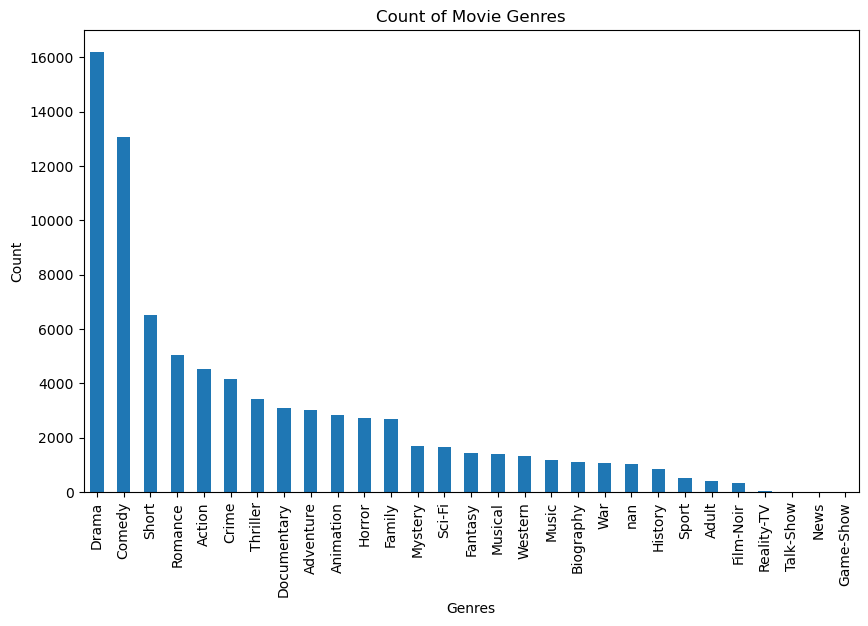

In [ ]:
#Plotting different genres against their count
import pandas as pd
import matplotlib.pyplot as plt

my_genres = pd.Series(cleaned_list)
genre_counts = my_genres.value_counts()

plt.figure(figsize=(10 , 6)) 

genre_counts.plot(kind='bar')

plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Count of Movie Genres')

plt.show()


In [38]:
#Getting the average Runtime for each genre 
import pandas as pd
genre_runtimes = df.groupby(my_genres)['RuntimeMins'].mean()
print(genre_runtimes)

Action         80.066079
Adult          81.977358
Adventure      79.157623
Animation      81.596838
Biography      80.676007
Comedy         82.086662
Crime          81.155534
Documentary    81.043091
Drama          81.801384
Family         85.340852
Fantasy        78.899642
Film-Noir      67.869565
Game-Show      79.250000
History        85.229947
Horror         80.910394
Music          81.843525
Musical        81.277286
Mystery        84.311496
News           88.900000
Reality-TV     77.400000
Romance        82.250856
Sci-Fi         80.105740
Short          83.416799
Sport          82.061224
Talk-Show      70.375000
Thriller       81.220009
War            77.650289
Western        77.445312
nan            83.685363
Name: RuntimeMins, dtype: float64


In [46]:
import pandas as pd

# Assuming you have already defined the DataFrame df and my_genres

genre_runtimes = df.groupby(my_genres)['RuntimeMins'].mean()
mean_runtimes_list = genre_runtimes.values.tolist()

print(mean_runtimes_list)


[80.06607929515418, 81.97735849056603, 79.1576227390181, 81.59683794466403, 80.67600700525394, 82.08666247247562, 81.1555338859093, 81.04309063893017, 81.80138351506625, 85.34085213032581, 78.89964157706093, 67.8695652173913, 79.25, 85.22994652406418, 80.91039426523298, 81.84352517985612, 81.27728613569322, 84.3114956736712, 88.9, 77.4, 82.25085616438356, 80.10574018126889, 83.41679923639835, 82.06122448979592, 70.375, 81.22000905387053, 77.65028901734104, 77.4453125, 83.68536251709986]


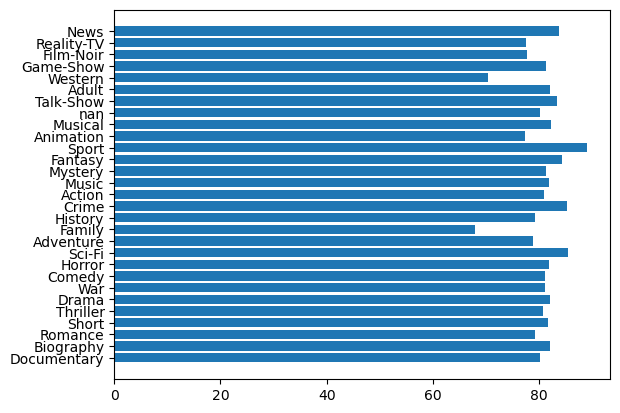

In [55]:
plt.barh(list2 , mean_runtimes_list)
plt.show()

In [63]:
print(df['imdbRating'].isnull().sum())
print(df['Domestic_Gross'].isnull().sum())
print(df['Gross'].isnull().sum())
print(df.shape)

#print(df[['imdbRating','imdbVotes']].corr())

740
35276
35276
(39805, 41)


In [77]:
#Determining the relationship between imdb parameters and the net gross of the movie

print(df['imdbRating'].corr(df['Gross']))
#print(df['imdbRating'].corr(df['Domestic_Gross']))
#print(df['imdbVotes'].corr(df['Domestic_Gross']))
print(df['imdbVotes'].corr(df['Gross']))


0.20768868077718747
0.6286790226938885


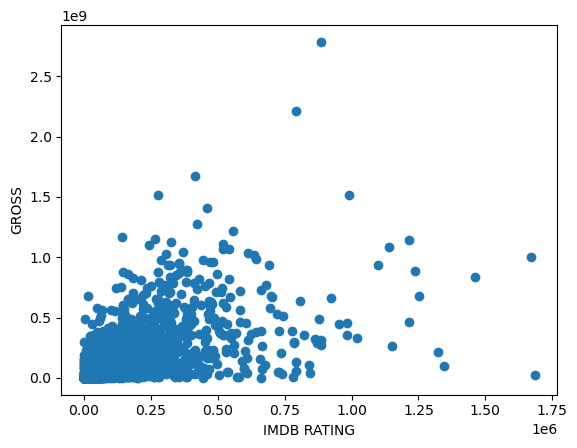

0.6286790226938885


In [89]:
#Determining relationship imdb user rating and the net gross of the movie worldwide

import matplotlib.pyplot as plt
plt.scatter(df['imdbVotes'],df['Gross'])
plt.xlabel('IMDB RATING')
plt.ylabel('GROSS')
plt.show()
print(df['imdbVotes'].corr(df['Gross']))

0.49177587985100596
0.13655763604006585
0.1618330645925186
0.2191385527008934


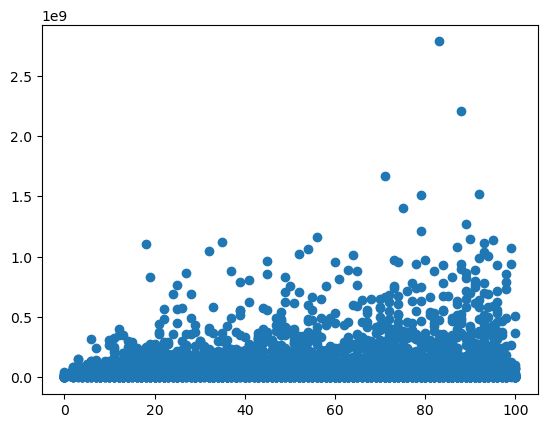

In [93]:
#Determining relationship between Tomato user ratings and the net gross of the movie 
#plt.scatter(df['tomatoMeter'],df['Gross'])
#print(df['tomatoReviews'].corr(df['Gross']))
#print(df['tomatoMeter'].corr(df['Gross']))
#print(df['tomatoRating'].corr(df['Gross']))
#print(df['tomatoUserRating'].corr(df['Gross']))


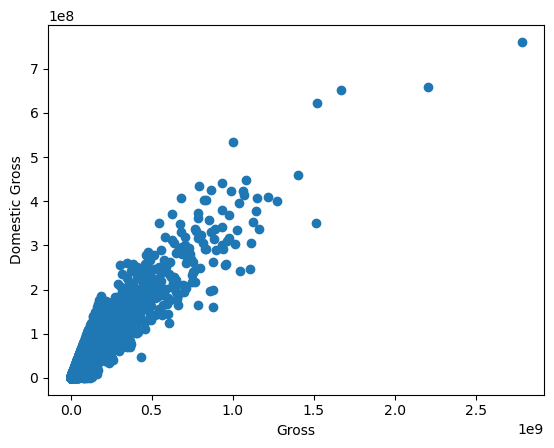

0.940015024029864


In [84]:
#Does movie performing better in the country of origin also performs better outside the country!?

import matplotlib.pyplot as plt
plt.scatter(df['Gross'],df['Domestic_Gross'])
plt.xlabel('Gross')
plt.ylabel('Domestic Gross')
plt.show()
print(df['Gross'].corr(df['Domestic_Gross']))


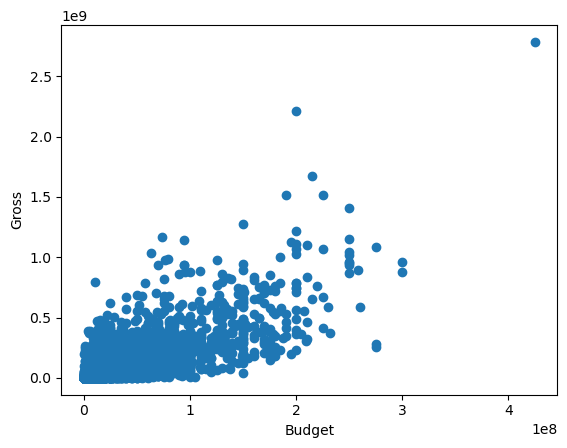

0.7431304920633744


In [97]:
#Does the budget of the movie have any impact on its net gross value ?
plt.scatter(df['Budget'],df['Gross'])
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.show()
print(df['Budget'].corr(df['Gross']))